#Tugas Pertemuan 4


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,MotoGP: Rekor-rekor di Sirkuit Mandalika,"Rabu, 25 Sep 2024 20:30 WIB",Jakarta - MotoGP Mandalika sudah menghadirkan ...,Olahraga,Jakarta MotoGP Mandalika sudah menghadirkan r...,jakarta motogp mandalika sudah menghadirkan r...,"['jakarta', 'motogp', 'mandalika', 'sudah', 'm...",jakarta motogp mandalika menghadirkan rekor ge...
1,BWF World Tour Finals 2024: Baru Tiga Wakil RI...,"Rabu, 25 Sep 2024 19:55 WIB",Jakarta - Ranking BWF World Tour Finals 2024 m...,Olahraga,Jakarta Ranking BWF World Tour Finals masih ...,jakarta ranking bwf world tour finals masih ...,"['jakarta', 'ranking', 'bwf', 'world', 'tour',...",jakarta ranking bwf world tour finals berjalan...
2,Video Marc Marquez Senyum-senyum Lihat Aksi Az...,"Rabu, 25 Sep 2024 19:46 WIB","Jakarta - Siswi SDN 7 Mataram, asal Kota Matar...",Olahraga,Jakarta Siswi SDN Mataram asal Kota Mataram ...,jakarta siswi sdn mataram asal kota mataram ...,"['jakarta', 'siswi', 'sdn', 'mataram', 'asal',...",jakarta siswi sdn mataram kota mataram nusa te...
3,MotoGP Mandalika: Bahagianya Marc Marquez Kemb...,"Rabu, 25 Sep 2024 19:40 WIB",Jakarta - MotoGP Mandalika 2024 berlangsung ak...,Olahraga,Jakarta MotoGP Mandalika berlangsung akhir p...,jakarta motogp mandalika berlangsung akhir p...,"['jakarta', 'motogp', 'mandalika', 'berlangsun...",jakarta motogp mandalika pekan marc marquez se...
4,MotoGP Mandalika 2024: Ada Pemenang Baru Lagi?,"Rabu, 25 Sep 2024 19:15 WIB",Jakarta - MotoGP Mandalika menyajikan pemenang...,Olahraga,Jakarta MotoGP Mandalika menyajikan pemenang ...,jakarta motogp mandalika menyajikan pemenang ...,"['jakarta', 'motogp', 'mandalika', 'menyajikan...",jakarta motogp mandalika menyajikan pemenang b...


**TF - IDF Weight**

---


In [3]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(df['kategori'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df)



Nilai sebelum dan sesudah konversi:
{'Makanan': 0, 'Olahraga': 1}

DataFrame setelah Label Encoding:
                                                judul  \
0            MotoGP: Rekor-rekor di Sirkuit Mandalika   
1   BWF World Tour Finals 2024: Baru Tiga Wakil RI...   
2   Video Marc Marquez Senyum-senyum Lihat Aksi Az...   
3   MotoGP Mandalika: Bahagianya Marc Marquez Kemb...   
4      MotoGP Mandalika 2024: Ada Pemenang Baru Lagi?   
..                                                ...   
95  Orang Jepang Gemar Makan Ikan Mentah, Ini 5 Fa...   
96  Keren! Pelayan Ini Selamatkan Pelanggan dari M...   
97  Ayam Goreng Terenak di Jepang Ini Lokasinya di...   
98  5 Bakmi Ayam Kampung Enak di Sunter dan Kelapa...   
99  Tom Yum Vs Tom Kha, Apa Beda Dua Sup Khas Thai...   

                          tanggal  \
0     Rabu, 25 Sep 2024 20:30 WIB   
1     Rabu, 25 Sep 2024 19:55 WIB   
2     Rabu, 25 Sep 2024 19:46 WIB   
3     Rabu, 25 Sep 2024 19:40 WIB   
4     Rabu, 25 Sep 2024 19:1

In [4]:
from sklearn.model_selection import train_test_split

# Split data
x = df['Filtering/stopword removal']
y = df['kategori_encoded']

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print("="*50)
print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

0     jakarta motogp mandalika menghadirkan rekor ge...
1     jakarta ranking bwf world tour finals berjalan...
2     jakarta siswi sdn mataram kota mataram nusa te...
3     jakarta motogp mandalika pekan marc marquez se...
4     jakarta motogp mandalika menyajikan pemenang b...
                            ...                        
95    jakarta orang jepang kebiasaan konsumsi ikan m...
96    jakarta aksi pelayan restoran tuai pujian berk...
97    jakarta jepang makan tersembunyi lokasinya ant...
98    jakarta pecinta kuliner bakmi pastinya melewat...
99    jakarta kuliner khas thailand bercita segar to...
Name: Filtering/stopword removal, Length: 100, dtype: object
0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: kategori_encoded, Length: 100, dtype: int64
Jumlah data latih: 80
Jumlah data uji: 20


In [5]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform pada data training
x_train_tfidf = tfidf.fit_transform(x_train)

# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)

df_train_tfidf

,aati,abad,abadi,abc,absen,acar,acara,aci,acosta,acute,...,yum,yummy,yuni,yzrm,yzrmdiyakini,zaitun,zaman,zayan,zhou,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.305825,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.08644,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.152766,0.0,0.089592,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0


In [6]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_train_tfidf_binary = df_train_tfidf.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,aati,abad,abadi,abc,absen,acar,acara,aci,acosta,acute,...,yum,yummy,yuni,yzrm,yzrmdiyakini,zaitun,zaman,zayan,zhou,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

            Node  Degree Centrality
2893        qobe           0.000262
2329         mie           0.000262
0           aati           0.000000
2548       pakan           0.000000
2537    pabrikan           0.000000
...          ...                ...
1275      indeks           0.000000
1276       india           0.000000
1277  individual           0.000000
1278    indofood           0.000000
3813        zona           0.000000

[3814 rows x 2 columns]


In [8]:
# Menghapus fitur di bawah top 10 terbaik
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()
filtered_df_train_tfidf_binary = df_train_tfidf_binary[top_10_features]

# Tampilkan hasil DataFrame yang sudah difilter
print("\nDataFrame setelah menghapus fitur di bawah top 10:")
filtered_df_train_tfidf_binary


DataFrame setelah menghapus fitur di bawah top 10:


,qobe,mie,aati,pakan,pabrikan,pacar,pacarnya,packets,pad,padang
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0


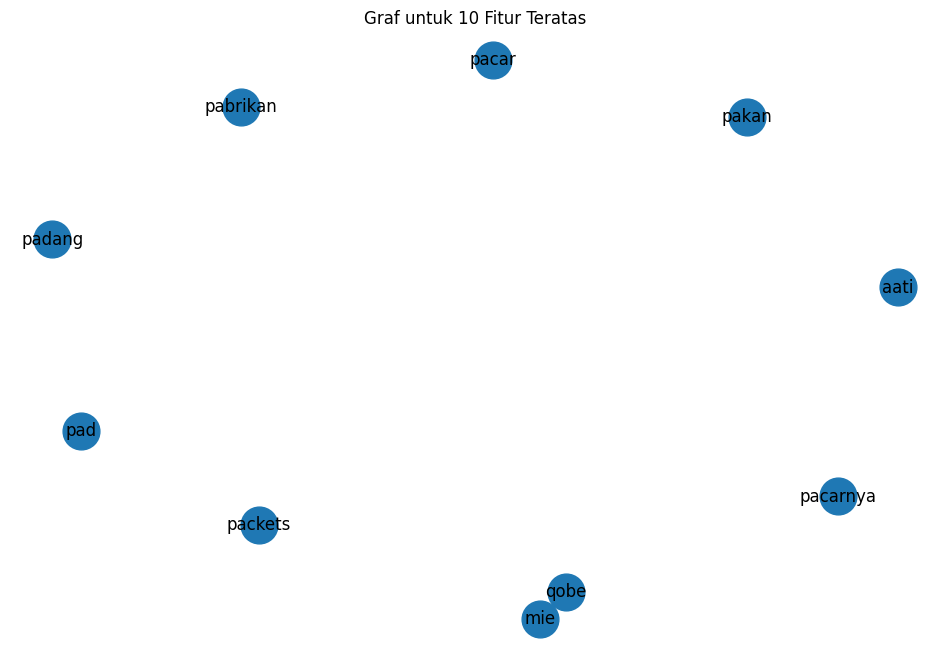

In [9]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

In [10]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

       Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0      qobe           0.000262              0.111111                     0.0
1       mie           0.000262              0.111111                     0.0
2      aati           0.000000              0.000000                     0.0
3     pakan           0.000000              0.000000                     0.0
4  pabrikan           0.000000              0.000000                     0.0
5     pacar           0.000000              0.000000                     0.0
6  pacarnya           0.000000              0.000000                     0.0
7   packets           0.000000              0.000000                     0.0
8       pad           0.000000              0.000000                     0.0
9    padang           0.000000              0.000000                     0.0


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity
cosine_sim_matrix = cosine_similarity(df_train_tfidf_binary[top_10_features].T)

# Membuat DataFrame untuk cosine similarity
df_cosine_sim = pd.DataFrame(cosine_sim_matrix, index=top_10_features, columns=top_10_features)

# Menampilkan hasil cosine similarity
print("Cosine Similarity antara Fitur Teratas:")
print(df_cosine_sim)

Cosine Similarity antara Fitur Teratas:
              qobe       mie  aati  pakan  pabrikan  pacar  pacarnya  packets  \
qobe      1.000000  0.707107   0.0    0.0       0.0    0.0       0.0      0.0   
mie       0.707107  1.000000   0.0    0.0       0.0    0.0       0.0      0.0   
aati      0.000000  0.000000   0.0    0.0       0.0    0.0       0.0      0.0   
pakan     0.000000  0.000000   0.0    0.0       0.0    0.0       0.0      0.0   
pabrikan  0.000000  0.000000   0.0    0.0       0.0    0.0       0.0      0.0   
pacar     0.000000  0.000000   0.0    0.0       0.0    0.0       0.0      0.0   
pacarnya  0.000000  0.000000   0.0    0.0       0.0    0.0       0.0      0.0   
packets   0.000000  0.000000   0.0    0.0       0.0    0.0       0.0      0.0   
pad       0.000000  0.000000   0.0    0.0       0.0    0.0       0.0      0.0   
padang    0.000000  0.000000   0.0    0.0       0.0    0.0       0.0      0.0   

          pad  padang  
qobe      0.0     0.0  
mie       0.0     0.

# **Pengujian sample baru**

---


In [12]:
# Mengimpor library yang diperlukan
import pandas as pd

# Teks berita yang telah dirapikan
# news_text_1 = """
# jakarta memakai alas kaki menginjak pasir tanah memicu dampak terpapar cacing parasit dialami anak namibia laporan diterbitkan jurnal scientific research anak namanya mengalami gatal parah bermain alas kaki pasir temantemannya menginjak kotoran anjing kucing terinfeksi terkontaminasi larva anak dibawa dokter diperiksa anak lakilaki berusia gatal parah kaki kirinya area terkena berubah warna gelap linier progresif disertai gatal garukan hebat bunyi jurnal keluarga tinggal daerah pinggiran kota padat penduduk rundu wilayah kavango timur namibia bunyi jurnal hasil pemeriksaan anak riwayat gigitan serangga cedera tumbuh normal menerima imunisasi lengkap usianya gizi sesuai usianya mengalami kondisi gatal parah berat badannya kg sistem dasarnya normal jurnal dicek kaki lesi eritematosa bercak kemerahan kulit menjalar diraba permukaan kaki kiri kebagian telapak kakinya lesi muncul berbentuk linier nyeri ditekan edema penumpukan cairan kulit terkena riwayat klinis menyingkirkan reaksi peradangan akibat gigitan serangga jurnal dokter anak terinfeksi cacing parasit cutaneous larva migrans clm kondisi cutaneous larva migrans clm infeksi cacing tambang nematoda menginfeksi anjing kucing kondisi ditemukan negaranegara berpendapatan rendah wilayah tropis subtropis pelancong wilayahwilayah penyakit disebabkan invasi kulit larva parasit cacing tambang masuk bergerak kulit menyebabkan reaksi peradangan hewan rentan terinfestasi membersihkan kaki mengendus kotoran tanah terkontaminasi larva berkembang tahap cacing tambang dewasa usus halus hewanhewan jurnal hewan terinfeksi membuang fesesnya tanah pasir lembap telur cacing menetas larva manusia anakanak terinfeksi berjalan bermain kaki beruang pasirtanah terinfeksi jurnal larva menembus kulit gagal memasuki aliran darah sistem limfatik menggali corium kulit merayap lapisan subkutan menciptakan terowongan lesi linear menonjol pemeriksaan fisik sambung jurnal anak obat pembasmi cacing meredakan seminggu gatal dialami menghilang lesi memudar anak dipantau enam minggu periode lesi sepenuhnya menghilang dipulangkan klinik jurnal sucsuc
# """

# news_text_2 = """
# jakarta viral media sosial penumpang krl pin hamil prediksi lahir hpl netizen menduga menyalahgunakan pin hamil duduk krl netizen menyoroti pengguna krl mengembalikan pin hamil hpl tolong dikaji penggunaan pin hamil disalahgunakan triggered yg orang balikin pinnya pake deposit kek kek pin udah exp knp dipake tulis pengunggah postingan viral terkait postingan manager public relations kai commuter leza arlan pendalaman menindaklanjuti sesuai ketentuan pengguna mendaftarkan dri pin hamil kedaluarsa tercatat sisi pin menandakan batas penggunaan hpl petugas kai commuter mengirimkan email pengguna mengembalikan pin hamil mengembalikan pin batas pengembalian pin hamil batas hpl petugas konfirmasi h hpl pengembalian pin email leza detikcom jumat kai commuter mengimbau pengguna memiliki pin hamil melewati batas hpl mengembalikan pin petugas stasiun menindak pengguna pin hamil melebihi batas hpl tutup leza sucsuc"""

news_text_1 = """
Jakarta  MotoGP Mandalika sudah menghadirkan rekor dalam dua gelaran Berikut ini adalah deretannya Sejak  MotoGP Mandalika digelar Dalam dua edisi itu ada dua rider berbeda yang menjadi pemenang main race Miguel Oliveira menjadi pemenang di MotoGP Mandalika  bersama KTM Francesco Bagnaia menjadi yang terbaik bersama Ducati pada  Soal rekor fastest lap Luca Marini yang memegang rekornya Dia mencatatkannya musim lalu saat masih memperkuat VR Racing Team Marini melahap satu lap dengan catatan waktu  menit  detik Sementara untuk catatan lap tercepat saat balapan MotoGP Mandalika  Enea Bastianini yang menorehkannya Bersama Gresini Racing musim lalu dia membukukan itu dengan catatan waktu  menit  detik Top speed masih dipegang oleh rider Pramac Jorge Martin Martinator mencatatkan kecepatan  kilometerjam untuk bisa menjadi yang paling laju di MotoGP Mandalika MotoGP Mandalika  digelar pada akhir pekan ini Rangkaian balapan berlangsung pada  September  Akankah ada rekor yang terpecahkan lagi Rekorrekor di Mandalika  Fastest Lap Luca Marini   menit  detik MotoGP Mandalika   Lap Tercepat di Balapan Enea Bastianini   menit  detik MotoGP Mandalika   Top Speed Jorge Martin   kmjam  MotoGP Mandalika  casbay"""

news_text_2 = """
Pembalap andalan Yamaha Fabio El Diablo Quartararo mengaku senang bisa kembali ke Lombok untuk mengikuti seri MotoGP Mandalika  di Sirkuit Internasional Pertamina Mandalika dia optimis kembali bisa meraih podium setelah pada  lalu dia gagal meraih podium"""


# Mengubah teks menjadi DataFrame
data = pd.DataFrame([news_text_1, news_text_2], columns=['text'])

# Menampilkan DataFrame
print(data)

                                                text
0  \nJakarta  MotoGP Mandalika sudah menghadirkan...
1  \nPembalap andalan Yamaha Fabio El Diablo Quar...


In [13]:
# Mengimpor library yang diperlukan
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)


10 Fitur Terbaik:
        Feature     Score
53   mandalika  0.575858
72      motogp  0.427826
70      meraih  0.317796
83      podium  0.317796
42     kembali  0.317796
20         dia  0.296063
114       yang  0.294931
12        bisa  0.261089
19          di  0.252955
49         lap  0.245776


In [14]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
            mandalika    motogp    meraih    podium   kembali       dia  \
mandalika   1.000000  0.973872  0.542930  0.542930  0.542930  0.766860   
motogp      0.973872  1.000000  0.338033  0.338033  0.338033  0.601069   
meraih      0.542930  0.338033  1.000000  1.000000  1.000000  0.955333   
podium      0.542930  0.338033  1.000000  1.000000  1.000000  0.955333   
kembali     0.542930  0.338033  1.000000  1.000000  1.000000  0.955333   
dia         0.766860  0.601069  0.955333  0.955333  0.955333  1.000000   
yang        0.839778  0.941134  0.000000  0.000000  0.000000  0.295533   
bisa        0.664916  0.477919  0.988248  0.988248  0.988248  0.989280   
di          0.994412  0.944456  0.628550  0.628550  0.628550  0.830331   
lap         0.839778  0.941134  0.000000  0.000000  0.000000  0.295533   

               yang      bisa        di       lap  
mandalika  0.839778  0.664916  0.994412  0.839778  
motogp     0.941134  0.477919  0.944456  0.941134  
me

In [15]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)



Classification Matrix:
            mandalika  motogp  meraih  podium  kembali  dia  yang  bisa  di  \
mandalika          1       1       1       1        1    1     1     1   1   
motogp             1       1       0       0        0    1     1     0   1   
meraih             1       0       1       1        1    1     0     1   1   
podium             1       0       1       1        1    1     0     1   1   
kembali            1       0       1       1        1    1     0     1   1   
dia                1       1       1       1        1    1     0     1   1   
yang               1       1       0       0        0    0     1     0   1   
bisa               1       0       1       1        1    1     0     1   1   
di                 1       1       1       1        1    1     1     1   1   
lap                1       1       0       0        0    0     1     0   1   

           lap  
mandalika    1  
motogp       1  
meraih       0  
podium       0  
kembali      0  
dia          0

In [16]:
# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())
print("\nDegree:\n", degree)

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:\n", closeness)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:\n", betweenness)


Degree:
 {'mandalika': 11, 'motogp': 7, 'meraih': 8, 'podium': 8, 'kembali': 8, 'dia': 9, 'yang': 6, 'bisa': 8, 'di': 11, 'lap': 6}

Closeness Centrality:
 {'mandalika': 1.0, 'motogp': 0.6923076923076923, 'meraih': 0.75, 'podium': 0.75, 'kembali': 0.75, 'dia': 0.8181818181818182, 'yang': 0.6428571428571429, 'bisa': 0.75, 'di': 1.0, 'lap': 0.6428571428571429}

Betweenness Centrality:
 {'mandalika': 0.16666666666666666, 'motogp': 0.018518518518518517, 'meraih': 0.0, 'podium': 0.0, 'kembali': 0.0, 'dia': 0.037037037037037035, 'yang': 0.0, 'bisa': 0.0, 'di': 0.16666666666666666, 'lap': 0.0}


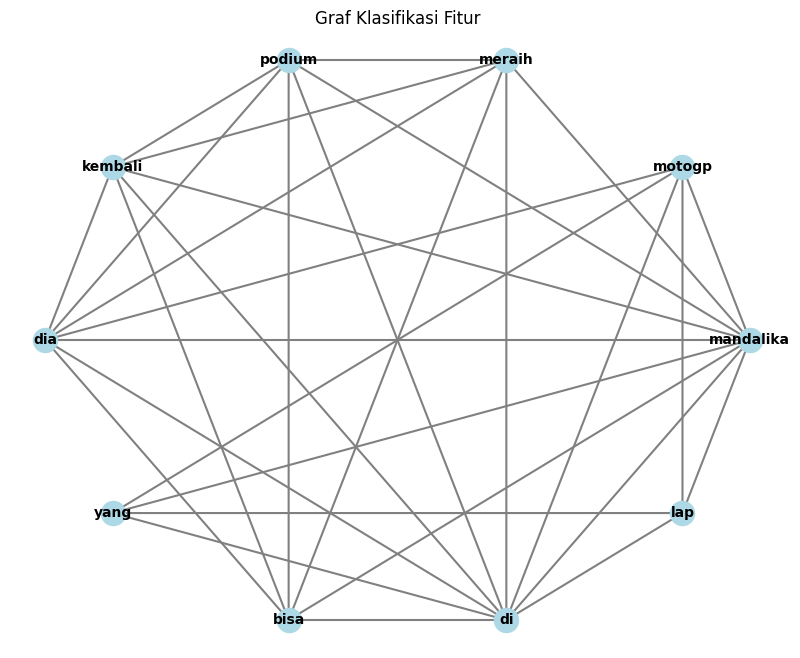

In [17]:
import matplotlib.pyplot as plt

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Plot setup
plt.figure(figsize=(10, 8))

# Membuat posisi untuk node secara manual dalam sebuah lingkaran
num_features = len(top_10_feature_names)
angles = [2 * i * 3.14159 / num_features for i in range(num_features)]
positions = {top_10_feature_names[i]: (np.cos(angles[i]), np.sin(angles[i])) for i in range(num_features)}

# Plot node
for feature, pos in positions.items():
    plt.scatter(*pos, s=300, color='lightblue', zorder=2)
    plt.text(pos[0], pos[1], feature, fontsize=10, ha='center', va='center', fontweight='bold', zorder=3)

# Plot edges berdasarkan cosine similarity >= 0.5
for i in range(num_features):
    for j in range(i+1, num_features):
        if classification.iloc[i, j] == 1:
            pos1 = positions[top_10_feature_names[i]]
            pos2 = positions[top_10_feature_names[j]]
            plt.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], color='gray', zorder=1)

# Pengaturan plot
plt.title("Graf Klasifikasi Fitur")
plt.axis('off')  # Menghilangkan sumbu
plt.show()